In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

!unzip /content/PlantVillage.zip

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=13

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

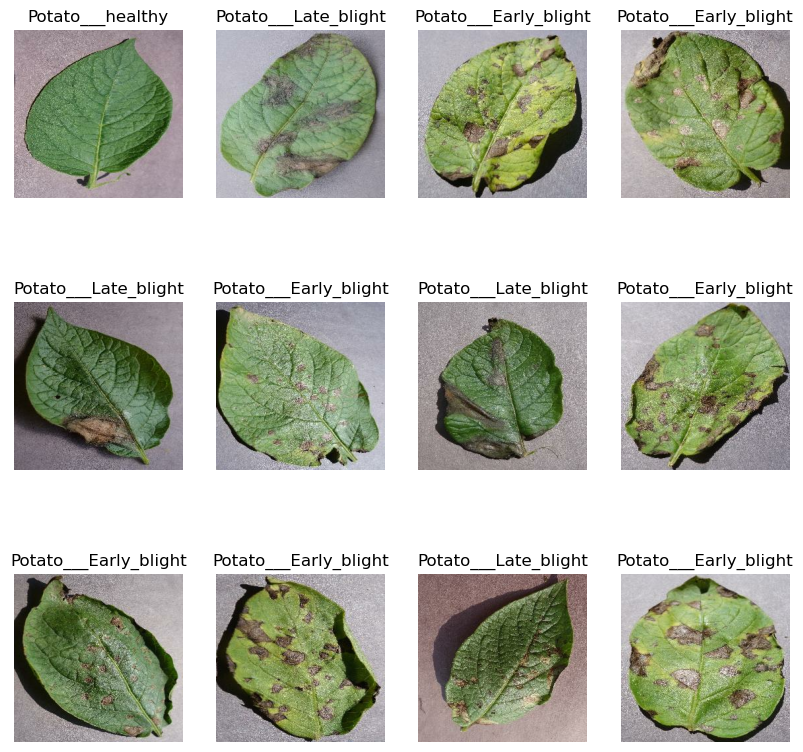

In [5]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [6]:
len(dataset)


68

In [7]:
0.8*len(dataset)

54.400000000000006

In [8]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [9]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)


In [10]:

len(val_ds)
len(test_ds)
len(train_ds)

54

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle= True, shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size= int(test_split*ds_size)
    
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [13]:
len(train_ds)

54

In [14]:
len(val_ds)

6

In [15]:
len(test_ds)

8

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3

model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

print(23)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [21]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/13


/Users/Abbas/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 33s 600ms/step - loss: 0.8902 - accuracy: 0.5000 - val_loss: 0.8883 - val_accuracy: 0.7604
Epoch 2/13
54/54 [==============================] - 34s 624ms/step - loss: 0.7070 - accuracy: 0.6817 - val_loss: 0.6366 - val_accuracy: 0.7448
Epoch 3/13
54/54 [==============================] - 35s 641ms/step - loss: 0.4562 - accuracy: 0.8148 - val_loss: 0.3723 - val_accuracy: 0.8854
Epoch 4/13
54/54 [==============================] - 40s 734ms/step - loss: 0.4008 - accuracy: 0.8385 - val_loss: 0.3208 - val_accuracy: 0.8958
Epoch 5/13
54/54 [==============================] - 48s 891ms/step - loss: 0.3251 - accuracy: 0.8600 - val_loss: 0.2766 - val_accuracy: 0.8750
Epoch 6/13
54/54 [==============================] - 44s 806ms/step - loss: 0.2531 - accuracy: 0.9005 - val_loss: 0.2451 - val_accuracy: 0.9115
Epoch 7/13
54/54 [==============================] - 39s 728ms/step - loss: 0.2340 - accuracy: 0.9039 - val_loss: 0.2775 - val_accuracy: 0.9115
Epoch 8/13

In [23]:
score= model.evaluate(test_ds)

8/8 [==============================] - 2s 131ms/step - loss: 0.3057 - accuracy: 0.8966


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

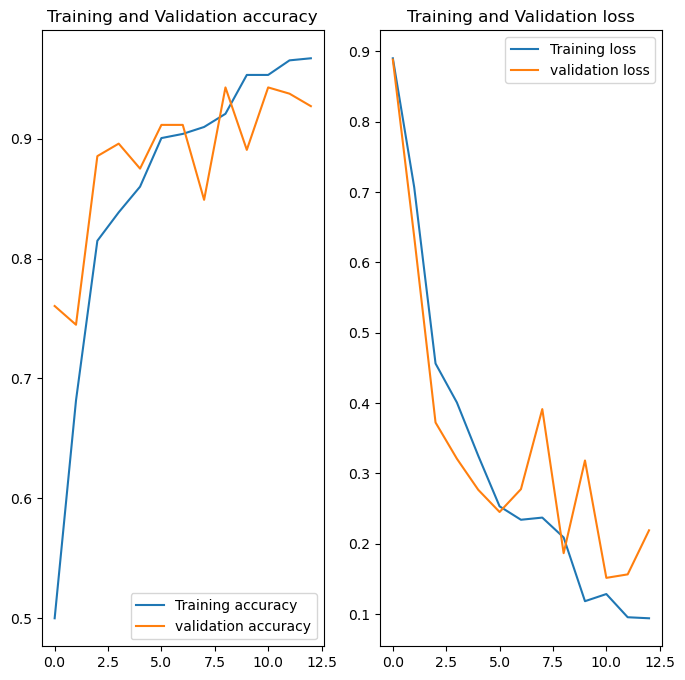

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label ='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label ='Training loss')
plt.plot(range(EPOCHS), val_loss, label ='validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')


first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 164ms/step
predicted label: Potato___Late_blight


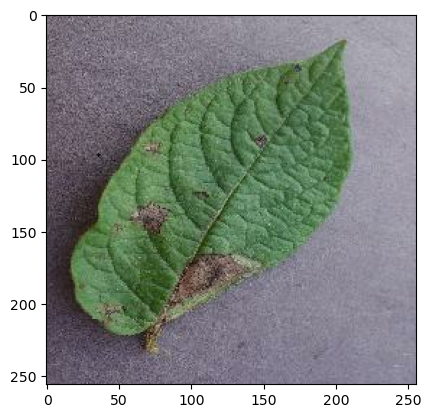

In [45]:
import numpy as np

for image_batch,labels_batch in test_ds.take(1):
    
    firstimage= image_batch[0].numpy().astype('uint8')
    firstlabel= labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(firstimage)
    print("actual label:",class_names[firstlabel])
    
    batch_prediction=model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)  #create a batch
    
    prediction=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(prediction[0])]
    
    confidence=round(100*np.max(prediction[0]),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 12ms/step


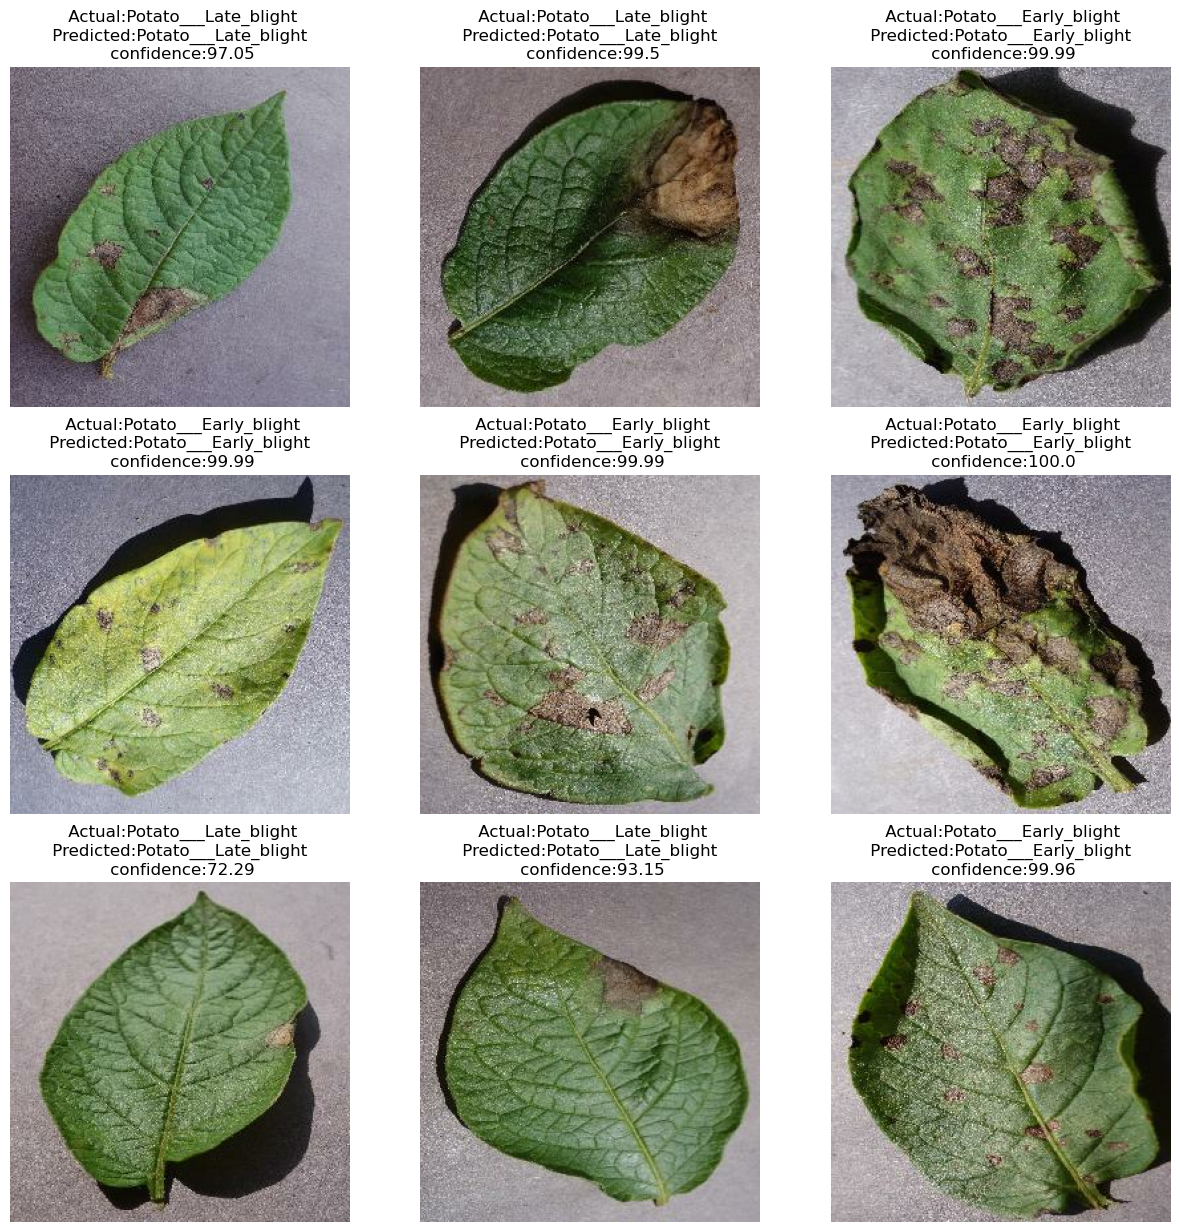

In [52]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f" Actual:{actual_class}\n Predicted:{predicted_class} \n confidence:{confidence}" )
        plt.axis("off")

In [53]:
model_version=1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets
